In [6]:
import pandas as pd
import glob

# Step 1: Read all CSVs
files = glob.glob("*.csv")

summary_data = []

for f in files:
    df = pd.read_csv(f)
    drug_name = f.split("/")[-1].replace(".csv", "")  # Extract file name as drug name
    
    total = len(df)
    count_def = (df["Strategy"].str.lower() == "defensive").sum()
    count_eva = (df["Strategy"].str.lower() == "evasive").sum()
    count_pes = (df["Strategy"].str.lower() == "pessimistic").sum()
    
    summary_data.append({
        "Drug": drug_name,
        "Total_DEGs": total,
        "Count_Defensive": count_def,
        "Count_Evasive": count_eva,
        "Count_Pessimistic": count_pes,
        "Percent_Defensive": (count_def / total * 100) if total else 0,
        "Percent_Evasive": (count_eva / total * 100) if total else 0,
        "Percent_Pessimistic": (count_pes / total * 100) if total else 0
    })

# Step 2: Create summary dataframe
summary_df = pd.DataFrame(summary_data)

# Step 3: Save summary
summary_df.to_csv("Summary_Table.csv", index=False)

print(summary_df)


       Drug  Total_DEGs  Count_Defensive  Count_Evasive  Count_Pessimistic  \
0       ami          47               42              4                  0   
1       cip         150              146              4                  0   
2  colistin          92               61             31                  0   
3      mero          96               83             13                  0   
4      poly          91               52             39                  0   
5      tige         114               31              0                 83   

   Percent_Defensive  Percent_Evasive  Percent_Pessimistic  
0          89.361702         8.510638             0.000000  
1          97.333333         2.666667             0.000000  
2          66.304348        33.695652             0.000000  
3          86.458333        13.541667             0.000000  
4          57.142857        42.857143             0.000000  
5          27.192982         0.000000            72.807018  


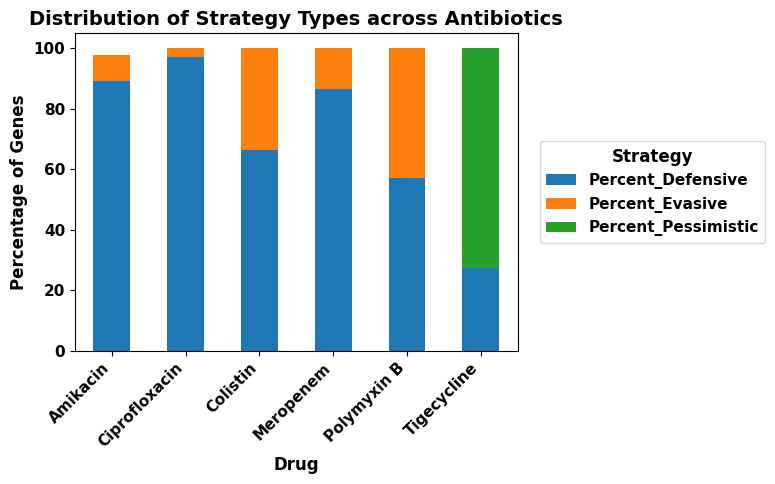

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Summary_Table.csv")

# Stacked bar chart
ax = df.plot(
    x="Drug",
    kind="bar",
    stacked=True,
    color=["#1f77b4", "#ff7f0e", "#2ca02c"],
    y=["Percent_Defensive", "Percent_Evasive", "Percent_Pessimistic"],
    figsize=(8,5)
)

plt.ylabel("Percentage of Genes")
plt.title("Distribution of Strategy Types across Antibiotics")
plt.legend(title="Strategy", bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderaxespad=0)

# Slanted x-axis labels
plt.xticks(rotation=45, ha="right")
# Tight layout for spacing
plt.tight_layout()
# Save high-resolution image (change format if needed: .png, .tiff, .pdf)
plt.savefig("Strategy_Distribution.png", dpi=600, bbox_inches="tight")

plt.show()